In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
x = np.loadtxt("./x.txt")
y = np.loadtxt("./y.txt")
u = np.loadtxt("./u.txt")
v = np.loadtxt("./v.txt")
rho = np.loadtxt("./rho.txt")
errors = np.loadtxt("./errors.txt")
nx = len(x)
ny = len(y)

x.shape, y.shape, u.shape, v.shape, rho.shape, errors.shape

((201,), (201,), (201, 201), (201, 201), (201, 201), (25723,))

In [3]:
# u[:, -1], v[:, -1]  # TOP

In [4]:
# u[:, 0], v[:, 0]  # BOTTOM

In [5]:
# u[0, :], v[0, :]  # LEFT

In [6]:
# u[-1, :], v[-1, :]  # RIGHT

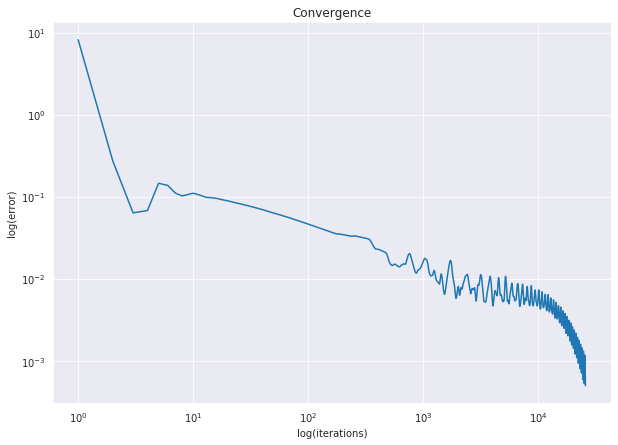

In [7]:
plt.figure(figsize=(10, 7))
sns.lineplot(range(1, len(errors)+1), errors)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("log(iterations)")
plt.ylabel("log(error)")
plt.title("Convergence")

plt.show()

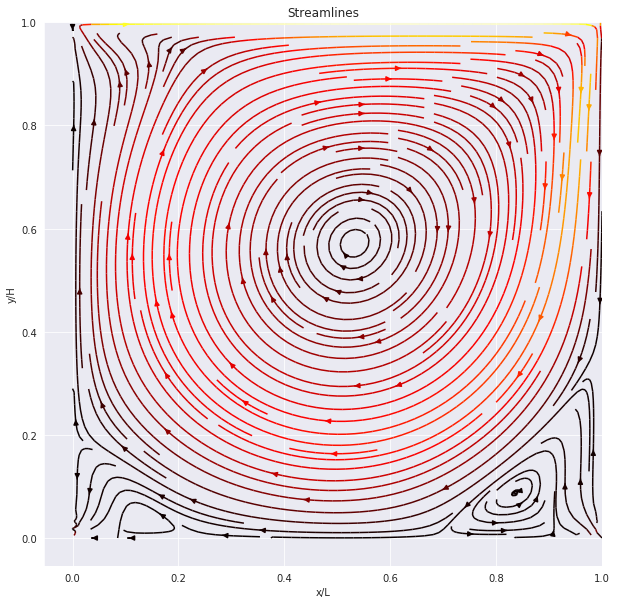

In [8]:
plt.figure(figsize=(10, 10))
plt.streamplot(x, y, u.T, v.T, density=2, color=np.sqrt(u.T*u.T + v.T*v.T), cmap='hot')
plt.xlabel("x/L")
plt.ylabel("y/H")
plt.title("Streamlines")

plt.show()

In [9]:
import pandas as pd
vertical = pd.read_csv("./Benchmarks/vertical_benchmark.csv")
horizontal = pd.read_csv("./Benchmarks/horizontal_benchmark.csv")

In [10]:
x_bm = vertical["x"]
v_bm = vertical["y = 0.5"]

y_bm = horizontal["y"]
u_bm = horizontal["x = 0.5"]

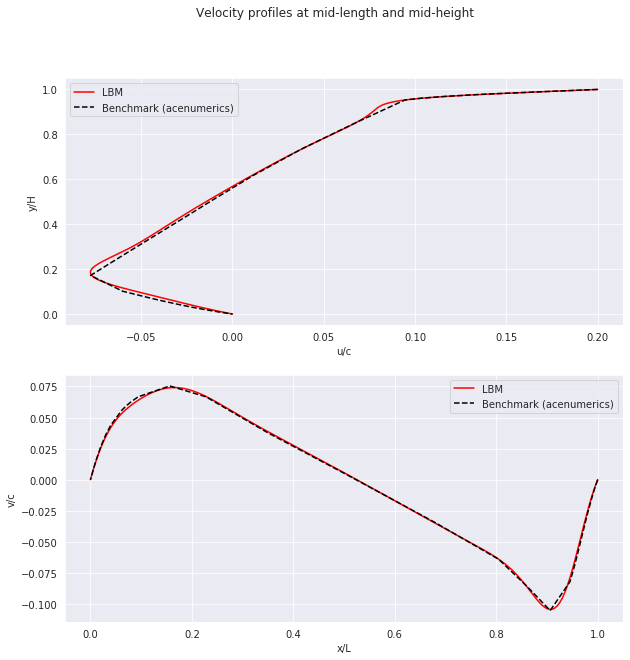

In [11]:
u_m = []
for j in range(ny):
    u_m.append(u[nx//2, j])
    
v_m = []
for i in range(nx):
    v_m.append(v[i, ny//2])

Ul = max(u_m)

plt.figure(figsize=(10, 10))
plt.suptitle("Velocity profiles at mid-length and mid-height")

plt.subplot(211)
plt.plot(u_m, y, color='r')
plt.plot(Ul*u_bm, y_bm, "k--")
plt.xlabel("u/c")
plt.ylabel("y/H")
plt.legend(["LBM", "Benchmark (acenumerics)"])

plt.subplot(212)
plt.plot(x, v_m, color='r')
plt.plot(x_bm, Ul*v_bm, 'k--')
plt.xlabel("x/L")
plt.ylabel("v/c")
plt.legend(["LBM", "Benchmark (acenumerics)"])

plt.show()